In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [204]:
df = pd.read_csv("bus_train.csv", index_col=0)
df.head()

,Timestamp_x,segment_id,BusLane_x,DayOfWeek_x,Holiday_x,HalfHourly,timeinseconds,intersections_x,busstops_x,AvgSpeed
NewVehicleRef,,,,,,,,,,
MTA NYCT_3828_1,2018-04-21 17:32:06.404000-04:00,1,False,6,1,3,63126,11,4,2.297799
MTA NYCT_3828_1,2018-04-27 18:38:40.371000-04:00,1,True,5,0,5,67120,11,4,3.013069
MTA NYCT_3828_1,2018-05-01 17:02:12.294000-04:00,1,True,2,0,2,61332,11,4,2.941267
MTA NYCT_3828_1,2018-04-21 17:37:56.484000-04:00,2,False,6,1,3,63476,15,5,1.005892
MTA NYCT_3828_1,2018-04-27 18:42:20.961000-04:00,2,True,5,0,5,67340,15,5,2.848134


In [205]:
df.columns

Index(['Timestamp_x', 'segment_id', 'BusLane_x', 'DayOfWeek_x', 'Holiday_x',
       'HalfHourly', 'timeinseconds', 'intersections_x', 'busstops_x',
       'AvgSpeed'],
      dtype='object')

In [207]:
df.columns = ['timestamp', 'segment', 'buslane', 'dayofweek', 'holiday',
              'halfhourly', 'timeinseconds', 'intersections', 'busstops', 'avgspeed']
df.shape

(3262, 10)

In [203]:
# percentage of records with negative speeds
len(df[df['avgspeed'] < 0]) / len(df) * 100

0.2452483139178418

In [210]:
# remove negative speeds
df = df[df['avgspeed'] > 0]
df.shape

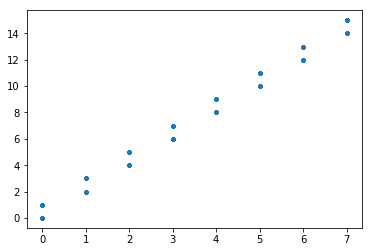

In [365]:
df['timespan'] = pd.cut(df.timeinseconds, range(57600, 73800, 900), right=False, labels=False)
plt.plot(df['halfhourly'], df['timespan'], '.')

In [424]:
X = df[['segment', 'buslane', 'dayofweek', 'holiday',
        'timespan', 'intersections', 'busstops']]
y = df['avgspeed']

In [425]:
X.head()

,segment,buslane,dayofweek,holiday,timespan,intersections,busstops
NewVehicleRef,,,,,,,
MTA NYCT_3828_1,1,False,6,1,6,11,4
MTA NYCT_3828_1,1,True,5,0,10,11,4
MTA NYCT_3828_1,1,True,2,0,4,11,4
MTA NYCT_3828_1,2,False,6,1,6,15,5
MTA NYCT_3828_1,2,True,5,0,10,15,5


In [426]:
X = preprocessing.scale(X)

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)

In [264]:
X.columns

Index(['segment', 'buslane', 'dayofweek', 'holiday', 'halfhourly',
       'intersections', 'busstops'],
      dtype='object')

In [428]:
rf = RandomForestRegressor(max_depth=6, n_estimators=30, n_jobs=-1, max_leaf_nodes=30, random_state=99)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=30,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=99, verbose=0, warm_start=False)

In [429]:
print(rf.feature_importances_)

[0.36778662 0.15035947 0.13471811 0.00644893 0.30092755 0.0329428
 0.00681653]


In [267]:
print(rf.predict([[2, 3, 15, 5, 2, 0, 1]]))

[1.86647584]


In [268]:
print(rf.predict([[2, 3, 15, 5, 7, 1, 0]]))

[2.15302484]


In [430]:
res = list(rf.predict(X_test) - y_test)
np.mean(res), np.std(res)

(-0.016995481058992956, 0.8863826083187076)

In [270]:
res = list(rf.predict(X_test) - y_test)
np.mean(res), np.std(res)

(-0.005906027210342983, 0.9016544915298385)

In [431]:
modelPred = rf.predict(X_test)

print(modelPred)
print("Number of predictions:", len(modelPred))

MSE = mean_squared_error(y_test, modelPred)

print("MSE:", MSE)

[1.98814334 1.97749941 2.18231619 3.22185852 2.22283599 2.78443663
 1.89299848 1.98814334 2.32388115 3.09870675 2.68481269 1.63961054
 1.87943885 3.17725386 2.220362   1.99681395 1.99681395 2.81626621
 2.01041954 2.15905959 1.97749941 4.00467432 1.63961054 1.98814334
 1.98814334 2.24501071 3.59338199 2.38442794 1.97749941 1.93237333
 1.98814334 3.16529107 2.7562216  2.57530315 1.76140507 3.55214959
 1.84302687 2.20915096 1.97749941 1.98814334 1.99681395 2.179551
 2.30837423 1.97749941 2.21210517 1.98814334 3.383785   1.86888727
 1.97749941 2.36002833 2.67649761 2.06459098 2.13556553 1.98814334
 3.472714   2.82152486 2.54483555 2.83919253 2.01041954 1.71557242
 2.220362   7.18318536 1.98814334 1.98814334 2.3432743  3.2452576
 1.99681395 3.33416406 1.7495101  3.2452576  1.99681395 2.66220283
 2.15102072 1.98814334 2.22283599 1.98814334 2.49260781 2.16920051
 1.97749941 1.65150551 2.75156211 1.86888727 3.4831712  2.470947
 2.56030498 2.46097846 1.97749941 2.60877259 2.21210517 2.21483876


In [432]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 11)]
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_leaf_nodes': range(2,30,3),
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [20, 51, 82, 113, 144, 175, 206, 237, 268, 300], 'max_depth': [5, 14, 24, 33, 43, 52, 62, 71, 81, 90, 100], 'max_leaf_nodes': range(2, 30, 3), 'bootstrap': [True, False]}


In [433]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False 
[CV] n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False 
[CV] n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False 
[CV] n_estimators=144, max_leaf_nodes=11, max_depth=24, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False, total=   0.2s
[CV] n_estimators=144, max_leaf_nodes=11, max_depth=24, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False, total=   0.2s
[CV] n_estimators=144, max_leaf_nodes=11, max_depth=24, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False, total=   0.3s
[CV] n_estimators=51, max_leaf_nodes=20, max_depth=62, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=20, max_depth=62, bootstrap=False, total=   0.2s
[CV] n_estimators=51, max_leaf_nodes=20, max_depth=62, bootstrap=False 
[CV]  n_es

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s


[CV]  n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True, total=   0.5s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True 
[CV]  n_estimators=268, max_leaf_nodes=23, max_depth=71, bootstrap=False, total=   0.9s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True 
[CV]  n_estimators=268, max_leaf_nodes=23, max_depth=71, bootstrap=False, total=   0.9s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=False 
[CV]  n_estimators=268, max_leaf_nodes=23, max_depth=71, bootstrap=False, total=   1.0s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=False 
[CV]  n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True, total=   0.5s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=False 
[CV]  n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=206, max_leaf_nodes=23, max_depth=71, bootstrap=False 
[CV]  n_estimators=175, max_leaf_nodes=5, max_d

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.5s


[CV]  n_estimators=51, max_leaf_nodes=23, max_depth=14, bootstrap=False, total=   0.2s
[CV] n_estimators=268, max_leaf_nodes=5, max_depth=62, bootstrap=True 
[CV]  n_estimators=51, max_leaf_nodes=23, max_depth=14, bootstrap=False, total=   0.2s
[CV] n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False, total=   0.4s
[CV] n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=268, max_leaf_nodes=5, max_depth=62, bootstrap=True, total=   0.9s
[CV] n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=268, max_leaf_nodes=5, max_depth=62, bootstrap=True, total=   0.9s
[CV] n_estimators=144, max_leaf_nodes=17, max_depth=33, bootstrap=True 
[CV]  n_estimators=268, max_leaf_nodes=5, max_depth=62, bootstrap=True, total=   0.9s
[CV] n_estimators=144, max_leaf_nodes=17, max_depth=33, bootstrap=True 
[CV]  n_estimators=144, max_leaf_nodes=2, max_

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   45.2s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [20, 51, 82, 113, 144, 175, 206, 237, 268, 300], 'max_depth': [5, 14, 24, 33, 43, 52, 62, 71, 81, 90, 100], 'max_leaf_nodes': range(2, 30, 3), 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [434]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MAPE = {:0.2f}%.'.format(mape))
    
    return accuracy
base_model = RandomForestRegressor(max_depth=6, n_estimators=30, n_jobs=-1, max_leaf_nodes=30, random_state=99)
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5922 degrees.
Accuracy = 60.08%.
MAPE = 39.92%.
Model Performance
Average Error: 0.5923 degrees.
Accuracy = 59.94%.
MAPE = 40.06%.
Improvement of -0.24%.


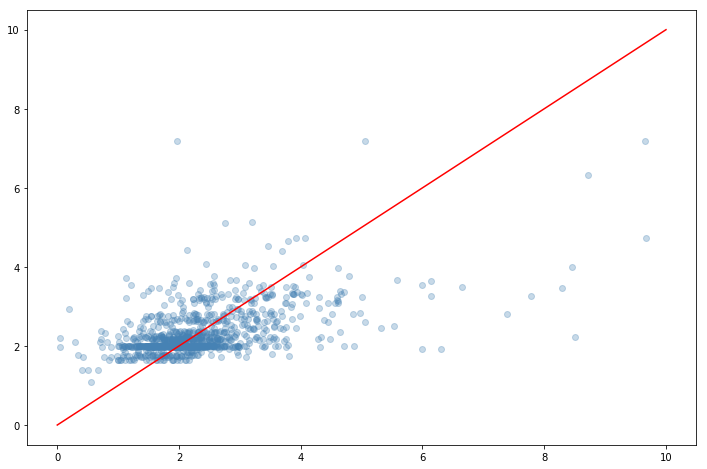

In [435]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.scatter(y_test, base_model.predict(X_test), color='steelblue', alpha=0.3)
# ax.scatter(y_test, predicted, color='limegreen', alpha=0.3)
# ax.scatter(y_test, p_OS, color='steelblue', alpha=0.3)

ax.plot([0,10], [0,10], 'r')


In [277]:
from sklearn import linear_model

In [436]:
#OLS
# Create linear regression object
model = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training set
model.fit(X=X_train, y=y_train)

# Make predictions using the testing set
predicted = model.predict(X_test)

# Find R^2 for InSample (train sample)
R_2_IS = model.score(X=X_train, y=y_train)

# Find R^2 for OutSample (test sample)
R_2_OS = model.score(X=X_test, y=y_test)

# A worse model will give negative R^2
print("The R-squared we found for IS OLS is: {0}".format(R_2_IS))
print("The R-squared we found for OS OLS is: {0}".format(R_2_OS))

The R-squared we found for IS OLS is: -5.215061661705458
The R-squared we found for OS OLS is: -4.7597978010768545


In [437]:
#For Lasso
lasso_alpha = 300

# Create Lasso regression object
Lasso=linear_model.Lasso(fit_intercept=True, alpha=lasso_alpha)

# Train the model using the training set
Lasso.fit(X_train, y_train)

# Prediction on the InSample data (train) 
p_IS=Lasso.predict(X_train)

# InSample R^2: 
print("The R-squared we found for IS Lasso is: {0}".format(Lasso.score(X=X_train, y=y_train)))

# Prediction on the OutSample data (test) 
p_OS=Lasso.predict(X_test)

# OutSample R^2: 
print("The R-squared we found for OS Lasso is: {0}".format(Lasso.score(X=X_test, y=y_test)))

The R-squared we found for IS Lasso is: 0.0
The R-squared we found for OS Lasso is: -0.0023543674846033813


In [438]:
# For Ridge
ridge_alpha = 1

# Create Ridge regression object
Ridge=linear_model.Ridge(fit_intercept=True,alpha=ridge_alpha) 

# Train the model using the training set
Ridge.fit(X_train, y_train)

# Prediction on the InSample data (train) 
p_IS=Ridge.predict(X_train)

# InSample R^2: 
print("The R-squared we found for IS Ridge is: {0}".format(Ridge.score(X_train, y_train)))
    
# Prediction on the OutSample data (test) 
p_OS=Ridge.predict(X_test)

# OutSample R^2: 
print("The R-squared we found for OS Ridge is: {0}".format(Ridge.score(X_test,y_test)))

The R-squared we found for IS Ridge is: 0.22953634974026582
The R-squared we found for OS Ridge is: 0.18771401385761854


In [308]:
train_x = X_train
train_y = y_train

In [439]:
mean_squared_error(y_test, predicted)

6.320327092885611

In [440]:
mean(list(predicted - y_test)), std(list(predicted - y_test))

(-2.3297662486278887, 0.9447308186144597)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid ={'alpha':np.logspace(-4, 0, 200)}

# OS=[]
# for i in range(10):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
#     rid=linear_model.Ridge()
#     gr=GridSearchCV(rid,param_grid=param_grid)
#     rs=gr.fit(X_train,y_train)
#     print rs.best_params_
#     OS.append(1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var())
# print np.mean(OS)

In [420]:
nn = MLPRegressor(hidden_layer_sizes=(100,),
                    activation='relu',
                    solver='lbfgs',
                    learning_rate='adaptive',
                    max_iter=1000,
                    learning_rate_init=0.05,
                    alpha=0.01,
                    random_state=2018)
nn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.05, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2018,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [421]:
nn.score(X_train, y_train)

0.5131003335138118

In [422]:
nn_predicted = nn.predict(X_test)

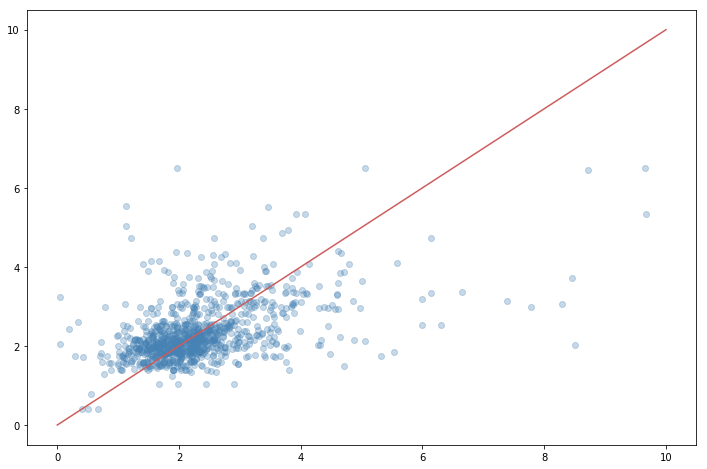

In [423]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.scatter(y_test, nn_predicted, color='steelblue', alpha=0.3)
ax.plot([0,10], [0,10], 'indianred')

In [261]:
X.head()

,segment,buslane,dayofweek,holiday,halfhourly,timeinseconds,intersections,busstops
NewVehicleRef,,,,,,,,
MTA NYCT_3828_1,1,False,6,1,3,63126,11,4
MTA NYCT_3828_1,1,True,5,0,5,67120,11,4
MTA NYCT_3828_1,1,True,2,0,2,61332,11,4
MTA NYCT_3828_1,2,False,6,1,3,63476,15,5
MTA NYCT_3828_1,2,True,5,0,5,67340,15,5


In [55]:
param_grid = {'max_depth':range(3,15),
              'n_estimators':range(1,100,5),
              'max_leaf_nodes':range(2,30,3),
              'random_state':range(1,100000,7000)}
rf = RandomForestRegressor(n_jobs=-1)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='neg_mean_squared_error')
rs = gs.fit(X_train,y_train)
print(rs.best_params_)

KeyboardInterrupt: 